# Self Attention Mechanism Assignment (Graded): Text Classification with AG News Dataset

Welcome to your programming assignment on Self Attention Mechanism! You will build a Deep Learning Model with Self Attention Mechanism for text classification on the AG News Dataset. 

## Problem Description

- In this assignment, you will explore and implement self-attention mechanisms for text classification using the AG News dataset.

- Your goal is to build and train a text classification model that utilizes self-attention to categorize news articles into predefined topics.

## Dataset Description

- The AG News dataset is a collection of news articles categorized into four classes:
    - World

    - Sports
    - Business
    - Sci/Tech

- The dataset consists of:
    - 120,000 training examples
    - 7,600 test examples

- Each example in the dataset contains:
    - Text: The news article text
    - Label: An integer (0-3) representing the category of the news article

- For more information about the AG News dataset, you can visit the following link: [AG News Dataset](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset)


## Assignment Tasks

1. **Data Preparation and Exploration**
    - Explore the dataset structure, including the number of samples, class distribution, and text length statistics.
    
    - Implement a function to preprocess the text data, including tokenization and padding.

2. **Implement a Self-Attention Layer**
    - Create a custom Keras layer that implements the self-attention mechanism.

    - The layer should take a sequence of word embeddings as input and output attention-weighted representations.

    - Implement the attention score calculation and softmax normalization.

3. **Build the Text Classification Model**

    - Design a neural network architecture that incorporates the self-attention layer.
    
    - The model should include an embedding layer, the self-attention layer, and output layers for classification.
    
    - Compile the model with appropriate loss function and optimizer.

4. **Train and Evaluate the Model**
    - Split the training data into training and validation sets.

    - Train the model on the training set and monitor its performance on the validation set.

    - Implement early stopping to prevent overfitting.

    - Evaluate the trained model on the test set and report accuracy and other relevant metrics.

5. **Prediction and Interpretation**
   - Use the trained model to make predictions on new, unseen reviews

## Instructions

- Only write code when you see any of the below prompts,

    ```
    # YOUR CODE GOES HERE
    # YOUR CODE ENDS HERE
    # TODO
    ```

- Do not modify any other section of the code unless tated otherwise in the comments.

# Code Section

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from helpers.methods import load_data, plot_results, detect_and_set_device
from tests.test_methods import test_vectorize_text, test_self_attention, test_create_model, test_train_model, test_evaluate_model

In [2]:
 # load data
train_data, test_data = load_data()

# Split training data into train and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
print("Data Spit into Train and Validation Sets")

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

c:\Users\arj64\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\arj64\.cache\huggingface\hub\datasets--ag_news. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset loaded successfully.
Data Spit into Train and Validation Sets


## Task: Let's get to know about our dataset

In [3]:
# Display the first few rows of the training data
train_data.head()

,Text,Class
53541,Support independent journalism Please donate n...,1
41728,Stingy Falcons Defense Key to 3-0 Start (AP) A...,2
74819,"Pak, Sri Lanka lock horns in Karachi Test toda...",2
106459,Villages tune in to digital trial Two villages...,4
63062,South African gold groups poised for merger A ...,3


### Shape of the dataset: Testing and Training

In [4]:
# TODO: Number of samples
train_samples = train_data.shape[0]
test_samples = test_data.shape[0]

print("Dataset Structure:")
print(f"Number of training samples: {train_samples}")
print(f"Number of test samples: {test_samples}")

Dataset Structure:
Number of training samples: 96000
Number of test samples: 7600


### Class distribution

In [5]:
# TODO: Class distribution
class_distribution = train_data['Class'].value_counts()
print("\nClass distribution:")
print(class_distribution)


Class distribution:
Class
3    24089
1    24044
2    23942
4    23925
Name: count, dtype: int64


### Visualizing class distribution

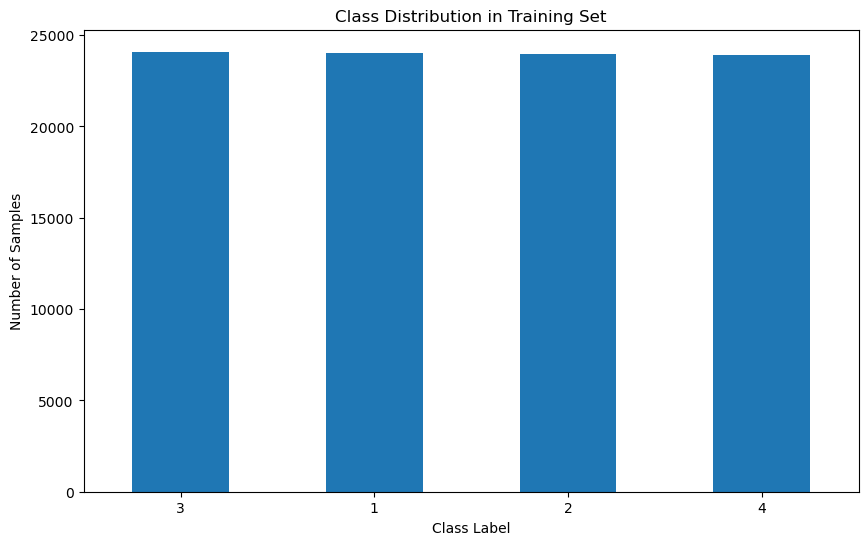

In [6]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

### Text length statistics

In [7]:
# Text length statistics
text_length_stats =train_data['Text'].apply(len).describe()

print("\nText length statistics:")
print(text_length_stats)


Text length statistics:
count    96000.000000
mean       236.555656
std         66.164717
min        100.000000
25%        196.000000
50%        232.000000
75%        266.000000
max       1012.000000
Name: Text, dtype: float64


### Visualizing text length distribution

In [9]:
# Visualize text length distribution
plt.figure(figsize=(10, 6))
train_data['Text'].hist(bins=50)
plt.title('Distribution of Text Lengths in Training Set')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

KeyboardInterrupt: 

## Task: Preprocessing the dataset

**Task Hints:**

Complete the vectorize_text function for preprocessing the text data.

- Use the TextVectorization layer from TensorFlow/Keras to convert the text data into sequences of integers.

- Set the maximum number of words in the vocabulary to 20,000 using the max_tokens parameter in TextVectorization.

- Set the maximum length for the sequences to 100 using the output_sequence_length parameter in TextVectorization.

- Adapt the vectorization layer to the training data using the adapt method, passing in the 'Text' column values from the train_data DataFrame.

- Return the configured vectorize_layer for use in the model.

In [10]:
# Text Vectorization
def vectorize_text(train_data, test_data):
    max_features = 20000
    sequence_length = 100
    
    # YOUR CODE GOES HERE
    vectorize_layer=tf.keras.layers.TextVectorization(max_tokens=max_features,output_sequence_length=sequence_length)
    vectorize_layer.adapt(train_data['Text'].values)
    # YOUR CODE ENDS HERE
    
    test_vectorize_text(vectorize_layer)
    
    return vectorize_layer

## Task: Building the Self-Attention Mechanism

**Task Hints:**

Implement the SelfAttention class as a custom layer in TensorFlow/Keras.

- Create a class that inherits from tf.keras.layers.Layer.

- In the __init__ method:
  - Initialize the parent class using super().
  - Create three Dense layers: W1 and W2 with the specified number of units, and V with one unit.

- Implement the call method to perform the self-attention mechanism:
  - Calculate the attention scores using the W1, W2, and V layers.
  - Apply softmax to get attention weights.
  - Use the attention weights to create a context vector.
  - Ensure the output shape is (batch_size, embedding_dim).

- Add comments to explain the shape of tensors at each step of the attention mechanism.

- Consider implementing a get_config method for serialization if you plan to save the model.

- Test the layer with sample input to ensure it produces the expected output shape.

In [11]:
# Self-Attention Layer
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(SelfAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, inputs):
        # TODO: inputs shape: (batch_size, seq_len, embedding_dim)
        # TODO: score shape: (batch_size, seq_len, 1)
        score = self.V(tf.nn.tanh(self.W1(inputs) + self.W2(inputs)))
        # TODO: attention_weights shape: (batch_size, seq_len, 1)
        attention_weights = tf.nn.softmax(score, axis=1)
        # TODO: context_vector shape: (batch_size, embedding_dim)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector
    
test_self_attention(SelfAttention(64))

SelfAttention test passed


## Task: Model Building

**Task Hints:**

Complete the create_model function to build the text classification model with self-attention.

- Use the Sequential API from Keras to create the model.

- Add the following layers in order:
  1. The vectorize_layer as the first layer to process input text.
  2. An Embedding layer with 20,000 input dimensions and 128 output dimensions.
  3. A Bidirectional LSTM layer with 64 units, setting return_sequences=True.
  4. The custom SelfAttention layer with 64 units.
  5. A Dense layer with 64 units and ReLU activation.
  6. A Dropout layer with a rate of 0.5 for regularization.
  7. A final Dense layer with 4 units (one for each class) and softmax activation.

- Compile the model with:
  - The sparse categorical crossentropy loss function.
  - The Adam optimizer.
  - Accuracy as the metric to monitor.

- Return the compiled model.

- Consider adding a summary() call to print the model architecture for verification.

- Ensure that the input and output shapes of each layer are compatible.

In [16]:
# Model Definition
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

def create_model(vectorize_layer):
    embedding_dim =128
    vocab_size=20000
    units=64
    num_classes=4

    # YOUR CODE GOES HERE
    model=Sequential([vectorize_layer,
                     Embedding(input_dim=vocab_size,output_dim=embedding_dim),
                     (LSTM(units,return_sequences=True)),
                     SelfAttention(units),
                     Dense(units,activation='relu'),
                     Dropout(0.5),
                     Dense(4, activation='softmax')]
                     )
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    # YOUR CODE ENDS HERE
    
    test_create_model(model)
    
    return model



## Task: Model Training

**Task Hints:**

Complete the train_model function to train the text classification model with early stopping.

- Set up an EarlyStopping callback:
  - Monitor the validation loss ('val_loss').
  - Set the patience to 3 epochs.
  - Enable restoring the best weights.

- Use the model.fit method to train the model:
  - Pass the training data (train_data['Text']) and labels (train_data['Class'] - 1).
  - Provide validation data using the validation_data parameter.
  - Set the number of epochs to 20.
  - Use a batch size of 32.
  - Include the early stopping callback in the callbacks list.

- Remember to subtract 1 from the class labels to make them 0-indexed, as required by the loss function.

- Return the training history object for later analysis and visualization.

- Consider adding a verbose parameter to control the output during training.

- Ensure that the input data types match what the model expects (text data for inputs, integer labels for targets).

In [17]:
# Training Function
from tensorflow.keras.callbacks import EarlyStopping
def train_model(model, train_data, val_data, runtime_device):
    # TODO: Define early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    with tf.device('/' + runtime_device + ':0'):
        # YOUR CODE GOES HERE
        train_texts = train_data['Text'].values
        train_labels = train_data['Class'].values - 1
        val_texts = val_data['Text'].values
        val_labels = val_data['Class'].values - 1
        history =model.fit(train_texts,train_labels,validation_data=(val_texts,val_labels),
                           epochs=20,batch_size=32,callbacks=[early_stopping],verbose=1)
        


        # YOUR CODE ENDS HERE
        
    test_train_model(history)
    return history

## Task: Model Evaluation

**Task Hints:**

Complete the evaluate_model function to assess the performance of the trained model on the test data.

- Use model.evaluate to compute the loss and accuracy on the test set:
  - Pass the test data (test_data['Text']) and labels (test_data['Class'] - 1).
  - Remember to subtract 1 from the class labels to make them 0-indexed.
  - Print the test accuracy with 4 decimal places.

- Generate predictions using model.predict:
  - Use the test data (test_data['Text']) as input.
  - Convert the predicted probabilities to class labels using np.argmax.

- Create a classification report:
  - Use sklearn's classification_report function.
  - Compare the true labels (test_data['Class'] - 1) with the predicted classes.
  - Print the classification report, which includes precision, recall, and F1-score for each class.

- Return the predicted classes for further analysis or visualization.

- Consider adding additional evaluation metrics if needed, such as confusion matrix or ROC AUC score.

- Ensure that the input data types match what the model expects (text data for inputs, integer labels for targets).

In [18]:
# Evaluation Function
from sklearn.metrics import classification_report
def evaluate_model(model, test_data):
    
    # TODO: Evaluate the model on the test data
    test_texts = test_data['Text'].values
    test_labels = test_data['Class'].values - 1

    loss, accuracy = model.evaluate(test_texts, test_labels, verbose=0)
    print(f"Test accuracy: {accuracy:.4f}")
    
    # TODO: Make predictions on the test data
    predictions=model.predict(test_texts)
    # TODO: Convert the predictions to class labels
    predicted_classes = np.argmax(predictions, axis=1)
    print(classification_report(test_data['Class'] - 1, predicted_classes))
    
    test_evaluate_model(predicted_classes)
    
    return predicted_classes

## Driver code to run the built pipeline

In [19]:
#---------------- Do not change the code below ----------------#

def main():
    # Set device
    device = detect_and_set_device()
    # Load and preprocess data
    train_data, test_data = load_data()
    
    # Split training data into train and validation sets
    train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
    
    # Create vectorization layer
    vectorize_layer = vectorize_text(train_data, test_data)
    
    # Create and compile model
    model = create_model(vectorize_layer)
    
    # Train model
    history = train_model(model, train_data, val_data, device)
    
    # Evaluate model
    predicted_classes = evaluate_model(model, test_data)
    
    return history, test_data, predicted_classes
    


if __name__ == "__main__":
    history, test_data, predicted_classes = main()

GPU is not available. Using CPU.
Dataset loaded successfully.
vectorize_text test passed


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (1, 100)               │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ self_attention_2                │ ?                      │   0 (unbuilt) │
│ (SelfAttention)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

create_model test passed
Epoch 1/20

1565/3000 ━━━━━━━━━━━━━━━━━━━━ 2:20 98ms/step - accuracy: 0.7513 - loss: 0.6298

KeyboardInterrupt: 

## Plot Training History

In [ ]:
#---------------- Do not change the code below ----------------#
# Run this cell to visualize results
plot_results(history, test_data, predicted_classes)